In [18]:
!pip install XGBoost

In [19]:
import pandas as pd


# Read the dataset
data = pd.read_csv('adult.csv')
print(data)

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

In [20]:
import warnings

warnings.filterwarnings("ignore")
# Step 1: Basic Info
basic_info = data.info()
missing_summary = data.isin(['?']).sum()  # Count of `?` in each column

# Step 2: Replace '?' with NaN for better handling
data.replace('?', pd.NA, inplace=True)

# Step 3: Drop rows where `native.country` is missing or NaN
data_cleaned = data.dropna(subset=['native.country'])

# Step 4: Replace NaN in other columns with their mode
for column in data_cleaned.columns:
    if data_cleaned[column].isna().sum() > 0:  # Check if there are missing values
        mode_value = data_cleaned[column].mode()[0]
        data_cleaned[column].fillna(mode_value, inplace=True)

# Display the cleaned data info and missing values summary
cleaned_info = data_cleaned.info()
missing_summary_cleaned = data_cleaned.isna().sum()

# Print Summary
print("Initial Missing Summary:")
print(missing_summary)
print("\nCleaned Data Missing Summary:")
print(missing_summary_cleaned)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (tot

## **EDA**


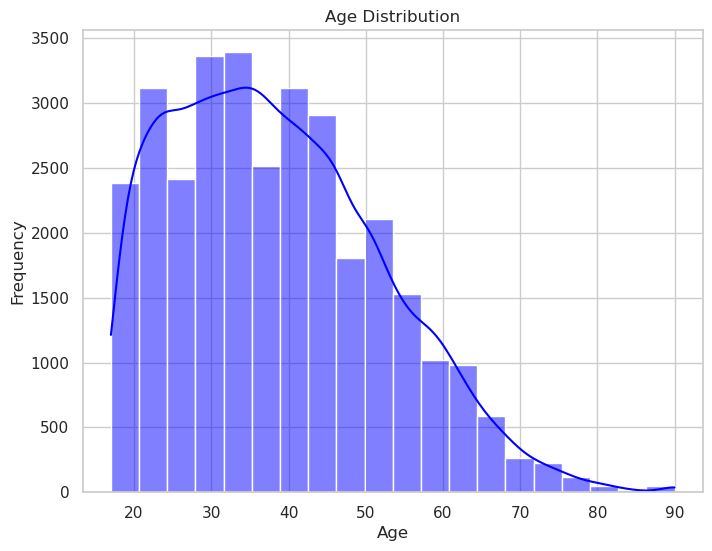

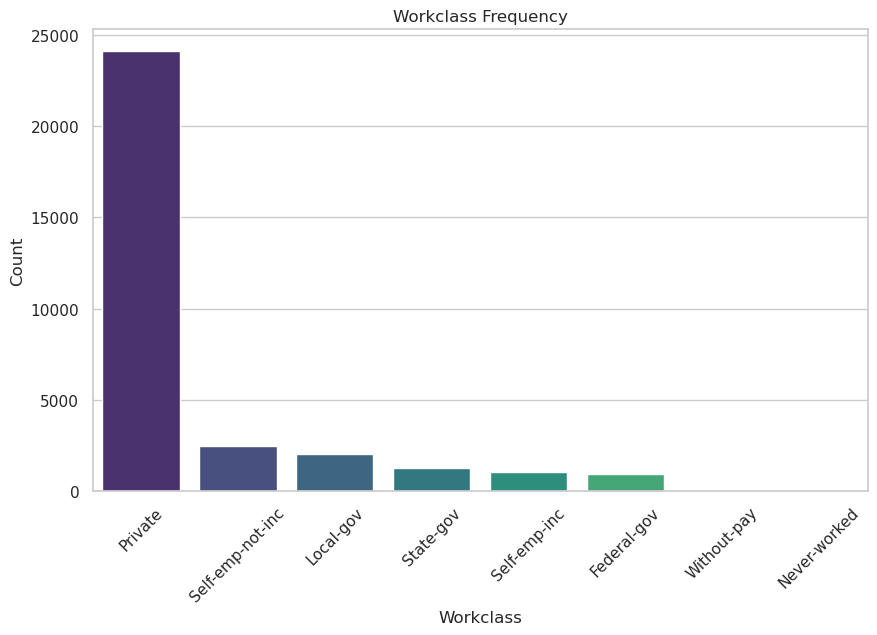

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# 1. Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Bar Plot for Workclass
plt.figure(figsize=(10, 6))
workclass_counts = data_cleaned['workclass'].value_counts()
sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')
plt.title('Workclass Frequency')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()





*   Age Distribution (Histogram):
The distribution is slightly right-skewed, with most individuals aged between 20 and 50.
There’s a gradual decline in frequency as the age increases beyond 50, with very few individuals above 80.
This indicates the dataset primarily represents the working-age population.
*   Workclass Frequency (Bar Plot):
The majority of individuals are employed in the "Private" sector, dominating other work classes by a large margin.
Other workclasses like "Self-emp-not-inc," "Local-gov," and "State-gov" have relatively lower representation.
Categories such as "Without-pay" and "Never-worked" are very rare, which could be flagged as outliers or grouped for simplification during feature engineering.

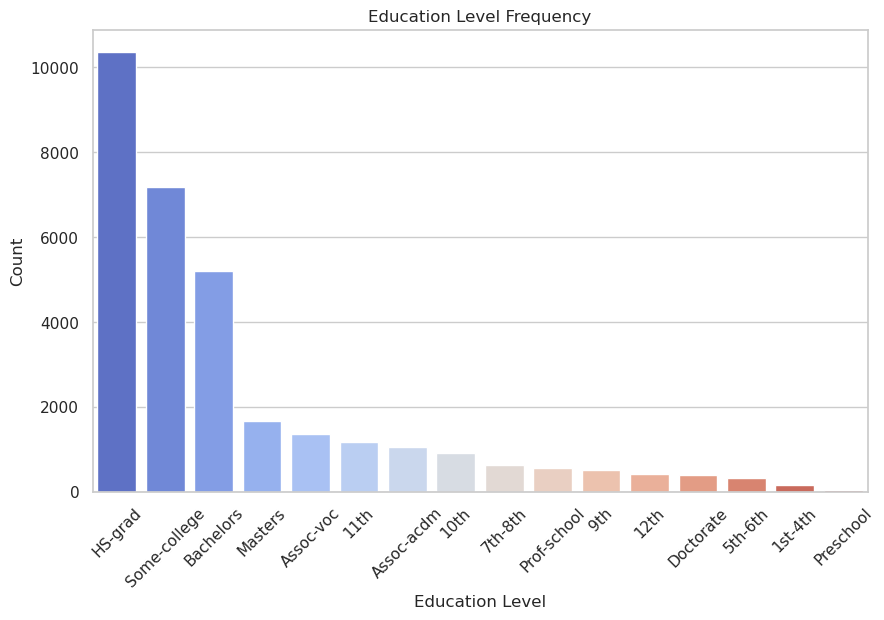

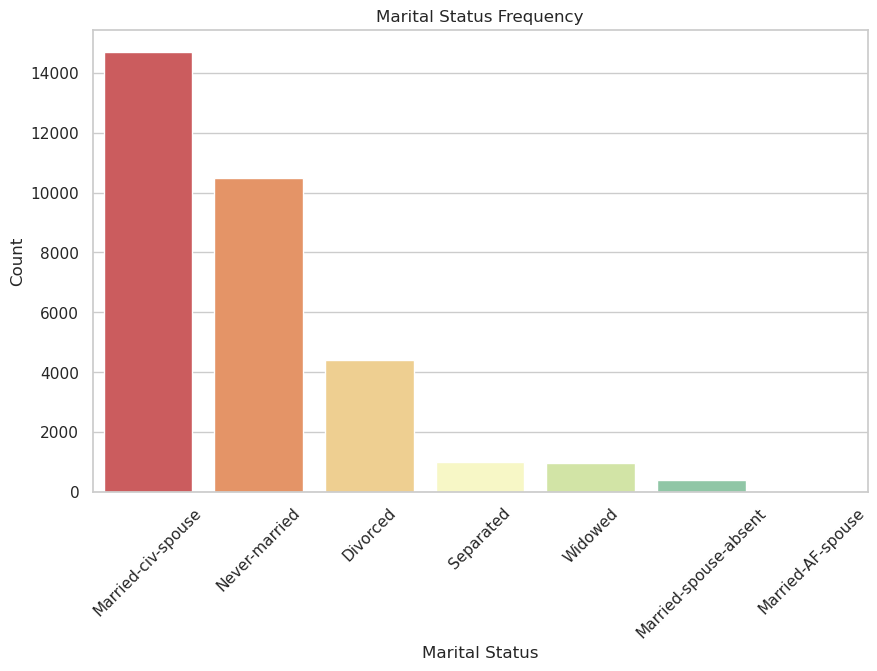

In [22]:
# 1. Bar Plot for Education Level
plt.figure(figsize=(10, 6))
education_counts = data_cleaned['education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values, palette='coolwarm')
plt.title('Education Level Frequency')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Bar Plot for Marital Status
plt.figure(figsize=(10, 6))
marital_counts = data_cleaned['marital.status'].value_counts()
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='Spectral')
plt.title('Marital Status Frequency')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




*   Education Level Frequency:
High-School Graduates (HS-grad) and Some-College represent the majority of the population, indicating a mid-level education dominance in the dataset.
Bachelors and Masters also have a significant representation, whereas advanced degrees (e.g., Doctorate, Prof-school) and lower education levels (e.g., 1st-4th, Preschool) are much less common.
This diversity in education levels provides a good range of data for analyzing its impact on income or other variables.

*   Marital Status Frequency:
The majority of individuals are Married-civ-spouse, followed by Never-married, indicating family structure plays a key role in the dataset.
Categories like Married-spouse-absent, Separated, and Widowed have lower representation, but they may provide valuable insights when analyzed for relationships with income.



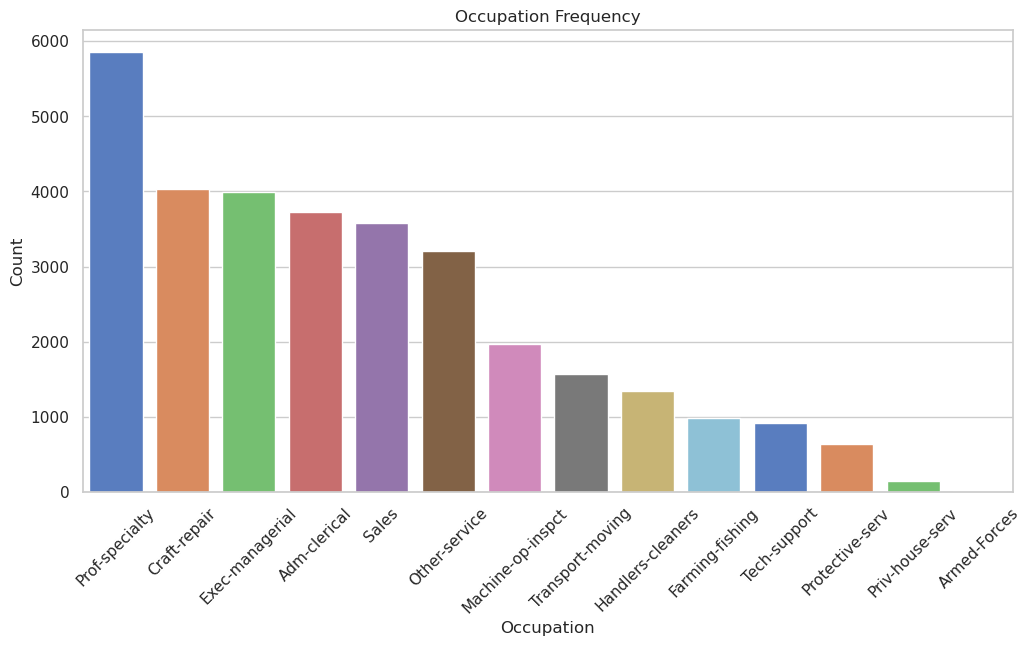

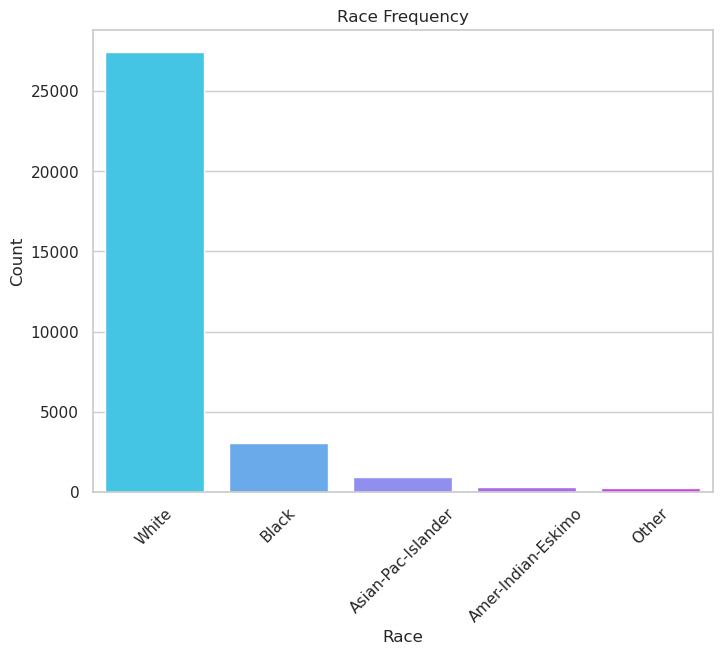

In [23]:
# 1. Bar Plot for Occupation
plt.figure(figsize=(12, 6))
occupation_counts = data_cleaned['occupation'].value_counts()
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='muted')
plt.title('Occupation Frequency')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Bar Plot for Race
plt.figure(figsize=(8, 6))
race_counts = data_cleaned['race'].value_counts()
sns.barplot(x=race_counts.index, y=race_counts.values, palette='cool')
plt.title('Race Frequency')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




*   Occupation Frequency:
The most common occupation is Prof-specialty, followed by Craft-repair and Exec-managerial.
Occupations like Protective-serv, Priv-house-serv, and Armed-Forces have very few entries, suggesting they may have limited predictive power or could be grouped with similar occupations during feature engineering.
The dataset captures a diverse range of occupations, which will likely influence the income classification.
*   Race Frequency:
The majority of individuals are identified as White, with smaller proportions of Black and other racial categories (e.g., Asian-Pac-Islander, Amer-Indian-Eskimo).
The dominance of a single race in the dataset might lead to skewed insights if not properly handled during model training.



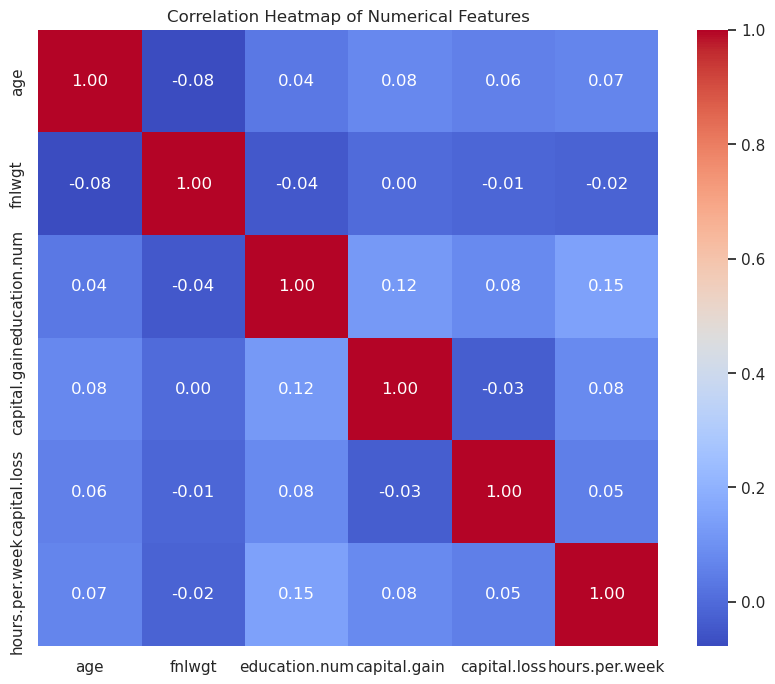

In [24]:
# Filter only numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix for numerical columns only
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()




*   Strong Correlations:
There is a moderate positive correlation between education.num and hours.per.week (0.15). This suggests higher education might be linked to more weekly working hours.
*   Weak Correlations:
Most numerical variables have very weak correlations with each other (close to 0), indicating little linear dependence.
capital.gain and capital.loss show very low correlations with other variables, which might suggest limited direct impact.
Overall, this highlights a lack of strong linear relationships among numerical features.



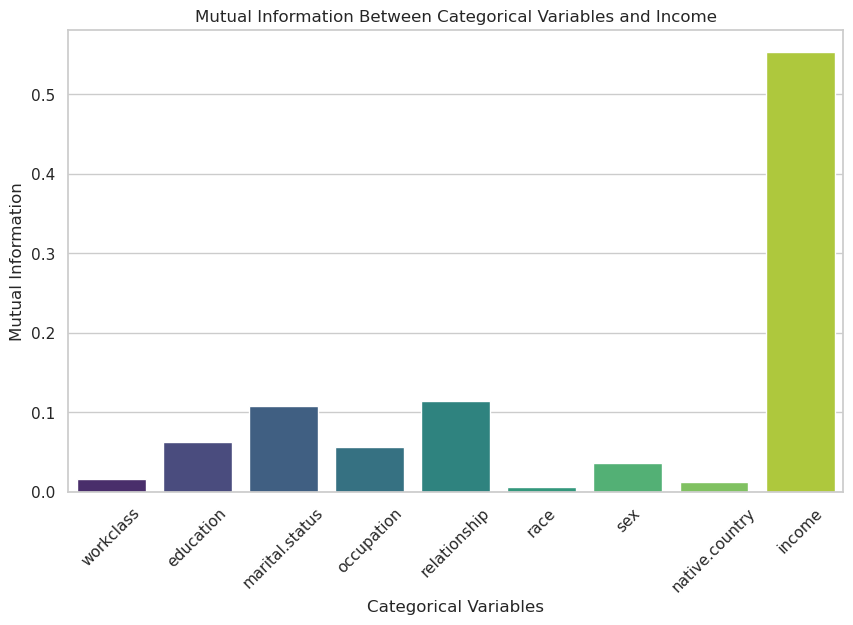

In [25]:
from sklearn.feature_selection import mutual_info_classif

# Select categorical variables
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Calculate mutual information between categorical features and the target variable ('income')
mutual_info = mutual_info_classif(data_cleaned[categorical_columns].apply(lambda x: x.astype('category').cat.codes),
                                  data_cleaned['income'].apply(lambda x: 1 if x == '>50K' else 0))

# Plot Mutual Information
plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_columns, y=mutual_info, palette='viridis')
plt.title('Mutual Information Between Categorical Variables and Income')
plt.xlabel('Categorical Variables')
plt.ylabel('Mutual Information')
plt.xticks(rotation=45)
plt.show()




*   High Mutual Information:
Relationship and Marital.status show moderate mutual information with the target variable (income), indicating these features play a significant role in income classification.
*   Low Mutual Information:
Race, Sex, and Native.country have very low mutual information, suggesting they may have limited predictive power for income.
Workclass and Occupation also show relatively low values, though they might still contribute in combination with other variables.



## **FEATURE ENGINEERING**

In [26]:
data_cleaned['net.capital.gain_loss'] = data_cleaned['capital.gain'] - data_cleaned['capital.loss']

# 2. Categorize `hours.per.week` into Part-time, Full-time, and Overtime
def categorize_hours(hours):
    if hours < 30:
        return 'Part-time'
    elif 30 <= hours <= 40:
        return 'Full-time'
    else:
        return 'Overtime'

data_cleaned['work_category'] = data_cleaned['hours.per.week'].apply(categorize_hours)

# Display the first few rows to verify the new features
data_cleaned[['capital.gain', 'capital.loss', 'net.capital.gain_loss', 'hours.per.week', 'work_category']].head()

,capital.gain,capital.loss,net.capital.gain_loss,hours.per.week,work_category
0,0,4356,-4356,40,Full-time
1,0,4356,-4356,18,Part-time
2,0,4356,-4356,40,Full-time
3,0,3900,-3900,40,Full-time
4,0,3900,-3900,40,Full-time


## **LABEL ENCODING**

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns for label encoding
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Apply label encoding to all categorical columns
for column in categorical_columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

# Display the first few rows of the encoded dataset to verify
data_cleaned.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,net.capital.gain_loss,work_category
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0,-4356,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0,-4356,2
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0,-4356,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0,-3900,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0,-3900,0


## SPLITTING DATA

In [28]:
from sklearn.model_selection import train_test_split

# Define target and features
X = data_cleaned.drop('income', axis=1)  # Features
y = data_cleaned['income']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((25582, 16), (6396, 16), (25582,), (6396,))

## **MODEL TRAINING**

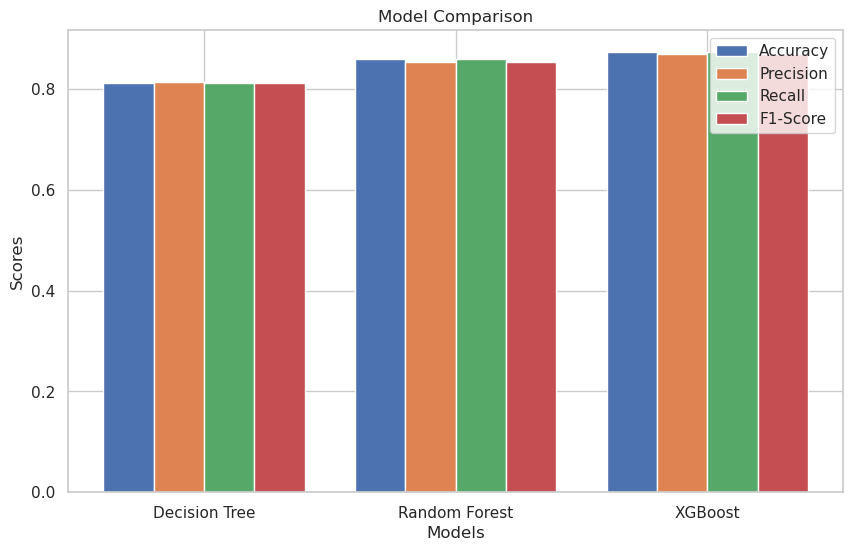

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize models with default parameters
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict on test data
dt_preds = decision_tree.predict(X_test)
rf_preds = random_forest.predict(X_test)
xgb_preds = xgboost.predict(X_test)

# Calculate evaluation metrics
models = ["Decision Tree", "Random Forest", "XGBoost"]
accuracies = [
    accuracy_score(y_test, dt_preds),
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, xgb_preds)
]
precisions = [
    precision_score(y_test, dt_preds, average='weighted'),
    precision_score(y_test, rf_preds, average='weighted'),
    precision_score(y_test, xgb_preds, average='weighted')
]
recalls = [
    recall_score(y_test, dt_preds, average='weighted'),
    recall_score(y_test, rf_preds, average='weighted'),
    recall_score(y_test, xgb_preds, average='weighted')
]
f1_scores = [
    f1_score(y_test, dt_preds, average='weighted'),
    f1_score(y_test, rf_preds, average='weighted'),
    f1_score(y_test, xgb_preds, average='weighted')
]

# Create a bar plot to compare models
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracies, width, label='Accuracy')
plt.bar(x, precisions, width, label='Precision')
plt.bar(x + width, recalls, width, label='Recall')
plt.bar(x + 2 * width, f1_scores, width, label='F1-Score')

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Comparison")
plt.xticks(x + width / 2, models)
plt.legend()
plt.show()

In [30]:
import plotly.graph_objects as go

# Interactive Plotly Bar Chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=models,
    y=accuracies,
    name='Accuracy',
    text=[f"{score:.4f}" for score in accuracies],
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=models,
    y=precisions,
    name='Precision',
    text=[f"{score:.4f}" for score in precisions],
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=models,
    y=recalls,
    name='Recall',
    text=[f"{score:.4f}" for score in recalls],
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=models,
    y=f1_scores,
    name='F1-Score',
    text=[f"{score:.4f}" for score in f1_scores],
    textposition='auto'
))

fig.update_layout(
    title="Model Comparison",
    xaxis_title="Models",
    yaxis_title="Scores",
    barmode='group',
    legend_title="Metrics",
    template='plotly_white'
)

fig.show()

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for i, model in enumerate(models):
    print(f"\n{model}:")
    print(f"  Accuracy:  {accuracies[i]:.4f}")
    print(f"  Precision: {precisions[i]:.4f}")
    print(f"  Recall:    {recalls[i]:.4f}")
    print(f"  F1-Score:  {f1_scores[i]:.4f}")

Model Evaluation Metrics:

Decision Tree:
  Accuracy:  0.8122
  Precision: 0.8134
  Recall:    0.8122
  F1-Score:  0.8128

Random Forest:
  Accuracy:  0.8590
  Precision: 0.8534
  Recall:    0.8590
  F1-Score:  0.8543

XGBoost:
  Accuracy:  0.8730
  Precision: 0.8686
  Recall:    0.8730
  F1-Score:  0.8691


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize the XGBoost model
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux201

({'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8},
 0.8722147984407108)

In [31]:
# Retrain XGBoost with the best parameters on the full training set
best_xgboost = XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=100,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model on the training data
best_xgboost.fit(X_train, y_train)

# Evaluate on the test set
tuned_xgb_preds = best_xgboost.predict(X_test)

# Calculate evaluation metrics
tuned_accuracy = accuracy_score(y_test, tuned_xgb_preds)
tuned_precision = precision_score(y_test, tuned_xgb_preds, average='weighted')
tuned_recall = recall_score(y_test, tuned_xgb_preds, average='weighted')
tuned_f1 = f1_score(y_test, tuned_xgb_preds, average='weighted')

# Output the results
tuned_accuracy, tuned_precision, tuned_recall, tuned_f1


(0.8744527829893683,
 0.8700605001698469,
 0.8744527829893683,
 0.8703519275767702)

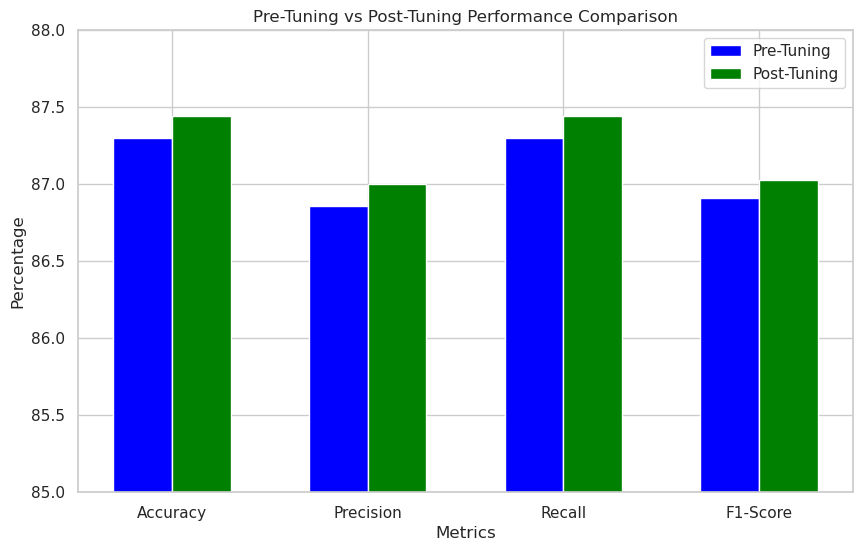

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Pre-Tuning Metrics
pre_tuning_metrics = [87.30, 86.86, 87.30, 86.91]  # Accuracy, Precision, Recall, F1-Score
# Replace the metrics below with actual values once post-tuning evaluation is complete
post_tuning_metrics = [87.445, 87.00, 87.445, 87.03]  # Accuracy, Precision, Recall, F1-Score

# Define metric labels
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))

# Plotting the comparison
width = 0.3
plt.figure(figsize=(10, 6))

plt.bar(x - width / 2, pre_tuning_metrics, width, label='Pre-Tuning', color='blue')
plt.bar(x + width / 2, post_tuning_metrics, width, label='Post-Tuning', color='green')

plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Pre-Tuning vs Post-Tuning Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim([85, 88])  # Focus on the range of metric values for better visualization
plt.show()
